## Lab 1 - Decision Tree

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

Load iris data set

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

Analyze the dataset

(150, 5)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
species
0    50
1    50
2    50
Name: count, dtype: int64


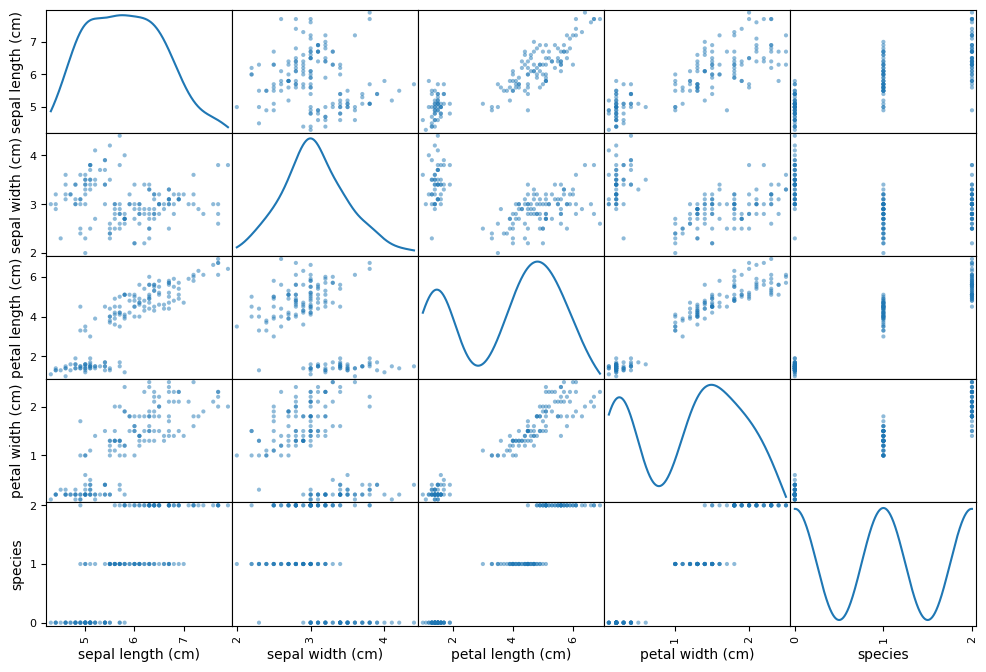

In [3]:
# Convert the data to a pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add the target column
df['species'] = iris.target
# Check the shape and summary of the data
print(df.shape)
print(df.describe())
# Check the distribution of the target classes
print(df['species'].value_counts())
# Plot the pairwise scatter plot of the features
pd.plotting.scatter_matrix(df, figsize=(12, 8), diagonal='kde')
plt.show()

Split the dataset into train and test. Fix the error in below code

In [4]:
from sklearn.model_selection import train_test_split
# Define the features and the target
X = df.drop('species', axis=1)
y = df['species']
# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train and test

In [5]:
# Create a decision tree classifier with gini criterion and maximum depth of 3
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
# Fit the model on the train data
dt.fit(X_train, y_train)
# Make predictions on the test data
y_pred = dt.predict(X_test)

Show the results

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


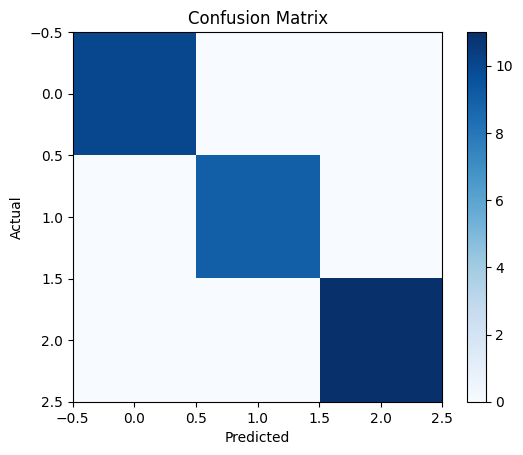

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Calculate the accuracy, precision, recall, and f1-score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# Print the results
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()
# Print the classification report
print(classification_report(y_test, y_pred))

Plot the tree

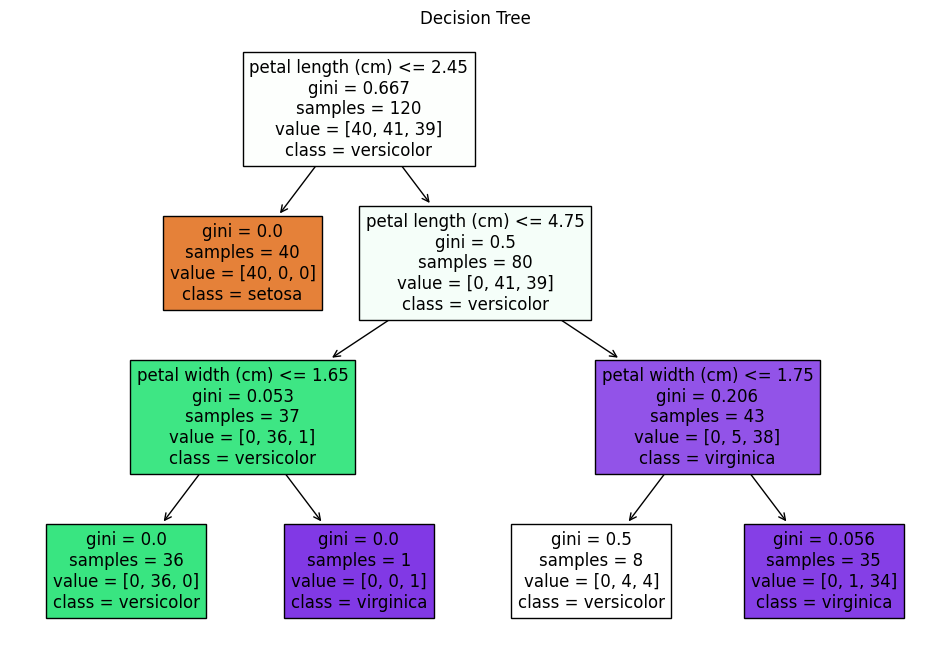

In [7]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree')
plt.show()

# Random Forest

In [ ]:
# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [ ]:
# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.head())
# Describe the dataset
#description = df.describe()
#print(description)
# Plot the pairwise scatter plot of the features
#pd.plotting.scatter_matrix(df, figsize=(12, 8), diagonal='kde')
#plt.show()

In [ ]:
df['target'] = data.target
X = df.loc[:, df.columns != 'target']
y = df.loc[:, 'target'].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model
rf_classifier.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
plt.figure(figsize=(20, 20))
_ = tree.plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, filled=True)
plt.show()

Classify Mushroom Using Decision Tree and Random Forest.

Dataset: https://archive.ics.uci.edu/dataset/73/mushroom

Submit:


1.   Submit your github link.
2.   Perform Exploratory Data Analysis (EDA) on the dataset.
3.   Evaluate and compare Random Forest tree accuracy for the folowing n_estimators values 1,50,100,150,200, and 250.
4.   Evaluate and compare performance of Random Forest and Decision Tree.
5.   Submit a report of EDA and results of tasks 3 and 4.

